### Theme 3: Classification Methods

gotta predict the chance of survival using one of the proposed algos

In [40]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
dataset = pd.read_pickle("./dataset.pkl")
dataset

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Pclass_1,Pclass_2,...,Sex_male,FamilySize,isSingle,officialTitle,ageGroup_Adult,ageGroup_Child,ageGroup_Senior,fareBin_Cheap,fareBin_Expensive,fareBin_Medium
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,False,False,...,True,2,False,Mr.,True,False,False,True,False,False
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,True,False,...,False,2,False,Mrs.,True,False,False,False,True,False
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,False,...,False,1,True,Miss.,True,False,False,True,False,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,True,False,...,False,2,False,Mrs.,True,False,False,False,True,False
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,False,False,...,True,1,True,Mr.,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,"Rice, Mrs. William (Margaret Norton)",39.0,0,5,382652,29.1250,False,False,...,False,6,False,Mrs.,True,False,False,False,False,True
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,False,True,...,True,1,True,Rev.,True,False,False,True,False,False
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,True,False,...,False,1,True,Miss.,False,True,False,False,False,True
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,True,False,...,True,1,True,Mr.,True,False,False,False,False,True


# Data preparation

In [42]:
x = dataset.drop(columns=[
    'Survived',
    'Name',
    'Ticket',
    'officialTitle',
    'PassengerId',
])
y = dataset['Survived']

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [46]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [47]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1])

In [48]:
accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred)

print(f"Accuracy : {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall   : {recall:.3f}")
print(f"F1-score : {f1:.3f}")

Accuracy : 0.790
Precision: 0.741
Recall   : 0.741
F1-score : 0.741


In [49]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[70, 15],
       [15, 43]])

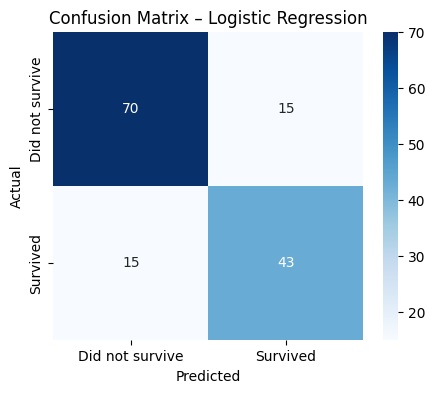

In [50]:
plt.figure(figsize=(5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Did not survive", "Survived"],
    yticklabels=["Did not survive", "Survived"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Logistic Regression")
plt.show()

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled  = scaler.transform(x_test)

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = range(1, 51)
accuracies_euclidean = []

for k in k_values:
    knn = KNeighborsClassifier(
        n_neighbors=k,
        metric="euclidean"
    )
    knn.fit(x_train_scaled, y_train)
    y_pred = knn.predict(x_test_scaled)
    accuracies_euclidean.append(accuracy_score(y_test, y_pred))

In [54]:
accuracies_euclidean

[0.6783216783216783,
 0.6923076923076923,
 0.7132867132867133,
 0.7272727272727273,
 0.7132867132867133,
 0.7552447552447552,
 0.7692307692307693,
 0.7692307692307693,
 0.7622377622377622,
 0.7762237762237763,
 0.7692307692307693,
 0.7622377622377622,
 0.7762237762237763,
 0.7762237762237763,
 0.7832167832167832,
 0.7692307692307693,
 0.7832167832167832,
 0.7832167832167832,
 0.7832167832167832,
 0.7762237762237763,
 0.7902097902097902,
 0.7692307692307693,
 0.7692307692307693,
 0.7622377622377622,
 0.7552447552447552,
 0.7692307692307693,
 0.7622377622377622,
 0.7622377622377622,
 0.7552447552447552,
 0.7762237762237763,
 0.7482517482517482,
 0.7692307692307693,
 0.7552447552447552,
 0.7692307692307693,
 0.7552447552447552,
 0.7622377622377622,
 0.7552447552447552,
 0.7622377622377622,
 0.7622377622377622,
 0.7552447552447552,
 0.7552447552447552,
 0.7552447552447552,
 0.7552447552447552,
 0.7552447552447552,
 0.7552447552447552,
 0.7552447552447552,
 0.7552447552447552,
 0.7552447552

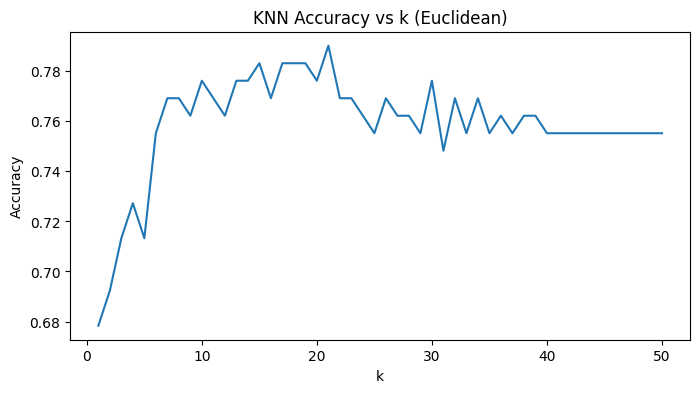

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(k_values, accuracies_euclidean)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs k (Euclidean)")
plt.show()


In [57]:
accuracies_manhattan = []

for k in k_values:
    knn = KNeighborsClassifier(
        n_neighbors=k,
        metric="manhattan"
    )
    knn.fit(x_train_scaled, y_train)
    y_pred = knn.predict(x_test_scaled)
    accuracies_manhattan.append(accuracy_score(y_test, y_pred))


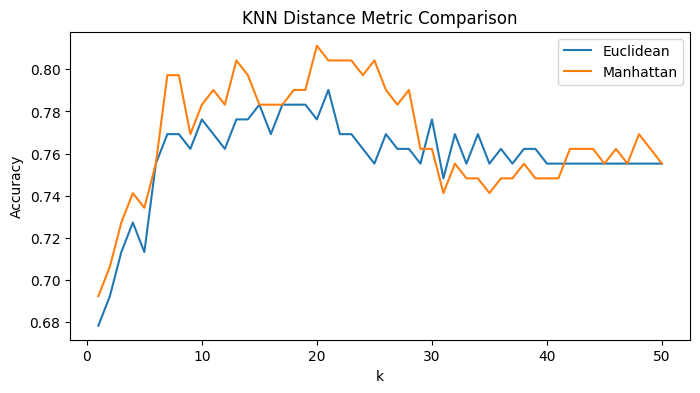

In [58]:
plt.figure(figsize=(8, 4))
plt.plot(k_values, accuracies_euclidean, label="Euclidean")
plt.plot(k_values, accuracies_manhattan, label="Manhattan")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("KNN Distance Metric Comparison")
plt.legend()
plt.show()


In [59]:
knn_unscaled = KNeighborsClassifier(n_neighbors=10)
knn_unscaled.fit(x_train, y_train)
y_pred_unscaled = knn_unscaled.predict(x_test)

acc_unscaled = accuracy_score(y_test, y_pred_unscaled)


In [61]:
knn_scaled = KNeighborsClassifier(n_neighbors=10)
knn_scaled.fit(x_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(x_test_scaled)

acc_scaled = accuracy_score(y_test, y_pred_scaled)

print("Accuracy without scaling:", acc_unscaled)
print("Accuracy with scaling   :", acc_scaled)


Accuracy without scaling: 0.7062937062937062
Accuracy with scaling   : 0.7762237762237763


In [63]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(x_train_scaled)
X_test_pca  = pca.transform(x_test_scaled)


In [64]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_pca, y_train)


,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",10
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


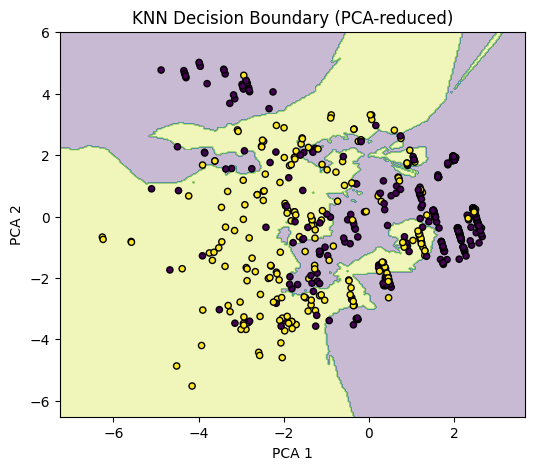

In [65]:
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6, 5))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(
    X_train_pca[:, 0],
    X_train_pca[:, 1],
    c=y_train,
    edgecolor="k",
    s=20
)
plt.title("KNN Decision Boundary (PCA-reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()
